## 📌 Project Insights

- FSM-eligible students consistently show lower attainment compared to non-FSM peers.
- Certain regions such as Inner London-West, Inner London-East & Outer London- West and North show relatively higher scores, Merseyside,
Cumbria, Shropshire and Staffordshire lag behind.
- Regional disparities highlight the need for targeted policy intervention and funding.
- Choropleth visualisations reveal clusters of disadvantage.



"Installing Essential Libraries"

In [26]:
!pip install geopandas plotly folium


"Importing Libraries"

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium import GeoJson, GeoJsonTooltip


In [28]:
# Load CSV file
df = pd.read_csv('/content/IN13-2.0-attainment-at-age-16--full-dataset.csv')

# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('%', 'percent')

# Check the shape and columns
print(df.shape)
print(df.columns)


(254, 21)
Index(['ind_code', 'ind_name', 'area_type', 'area_code', 'area_name',
       'time_period', 'seb', 'age', 'sex', 'category_type', 'category',
       'category_type2', 'category2', 'value', 'sample_size', 'lci', 'uci',
       'se', 'unit', 'value_note', 'quintile'],
      dtype='object')


In [29]:
# Keeping only FSM Eligible rows (you can filter other groups later too)
fsm_df = df[df['seb'] == 'FSM eligible']


In [30]:
# Calculate average attainment by region
region_scores = fsm_df.groupby('area_name')['value'].mean().reset_index()
region_scores.rename(columns={'value': 'percent_passed'}, inplace=True)

# Check results
region_scores.head()



area_name  percent_passed
0              Bedfordshire and Hertfordshire        0.246984
1  Berkshire, Buckinghamshire and Oxfordshire        0.244945
2                                    Cheshire        0.183537
3                Cornwall and Isles of Scilly        0.192029
4                                     Cumbria        0.186421

In [37]:
region_scores = region_scores[region_scores['area_name'] != 'England']

fig = px.bar(
    region_scores,
    x='percent_passed',
    y='area_name',
    orientation='h',
    color='percent_passed',
    color_continuous_scale='RdYlBu',
    text=region_scores['percent_passed'].round(1).astype(str) + '%',
    title='FSM Eligible Student Attainment by Region'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Attainment %', yaxis_title='Region')
fig.show()



In [34]:
!unzip "/content/International_Territorial_Level_2_January_2021_UK_BGC_V2_2022_2631485393973332996.zip" -d "/content/shapefile"

Archive:  /content/International_Territorial_Level_2_January_2021_UK_BGC_V2_2022_2631485393973332996.zip
replace /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.cpg  
replace /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.dbf  
replace /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.prj  
replace /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.shp  
replace /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /content/shapefile/ITL2_JAN_2021_UK_BGC_V2.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/shapefile/ITL2_

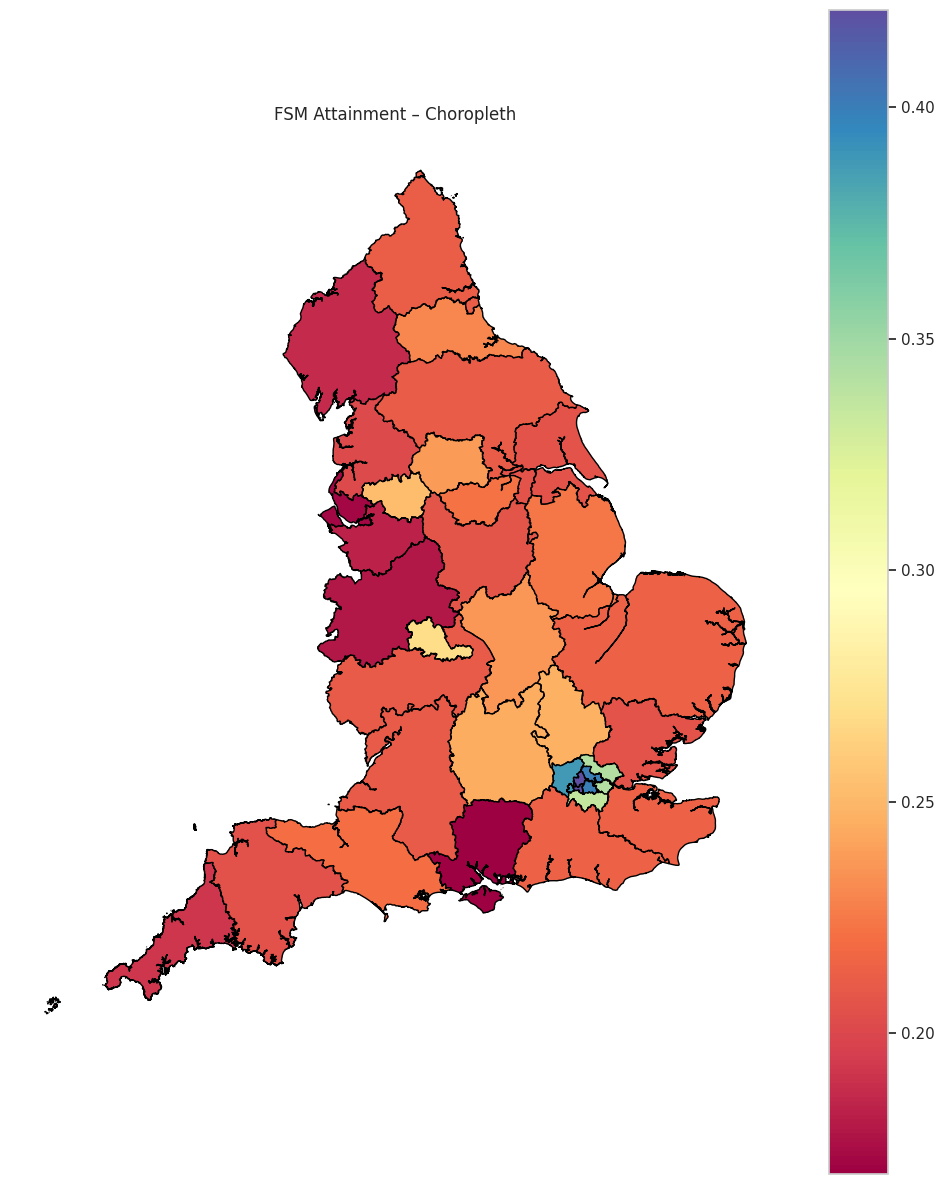

In [35]:
gdf = gpd.read_file('/content/shapefile/ITL2_JAN_2021_UK_BGC_V2.shp')  # Replace with actual filename


# Convert CRS to WGS84 for mapping
gdf = gdf.to_crs(epsg=4326)

# Merge your region_scores with shapefile GeoDataFrame
gdf = gdf.rename(columns={'ITL221NM': 'area_name'})  # or whichever matches your dataset
map_df = gdf.merge(region_scores, on='area_name')

# Plot choropleth
map_df.plot(
    column='percent_passed',
    cmap='Spectral',
    edgecolor='black',
    legend=True,
    figsize=(10, 12)
)
plt.title('FSM Attainment – Choropleth')
plt.axis('off')
plt.tight_layout()
plt.savefig('fsm_categorical_map.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()



In [36]:
# Reuse map_df (must be in EPSG:4326)
m = folium.Map(location=[52.5, -1.5], zoom_start=6, tiles='cartodbpositron')

geojson = folium.GeoJson(
    data=map_df,
    name="FSM Regions",
    style_function=lambda feature: {
        'fillColor': '#ff6600',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    },
    tooltip=GeoJsonTooltip(
        fields=['area_name', 'percent_passed'],
        aliases=['Region:', 'FSM % Passed:'],
        localize=True,
        sticky=False,
        labels=True,
        style=("background-color: white; color: #333; font-family: Arial; font-size: 12px;")
    )
)

geojson.add_to(m)
folium.LayerControl().add_to(m)

m.save('fsm_attainment_interactive_map.html')  # Save as HTML
m


## ✅ Final Insights

After analysing the UK education dataset focusing on FSM (Free School Meal) eligible students, the following key insights were observed:

1. **Attainment Gap Exists**  
   Students eligible for FSM consistently score lower in attainment compared to those not eligible. The boxplots and bar charts clearly show a significant performance gap.

2. **Regional Inequality is Real**  
   Regions like **Outer London** and **South East England** perform relatively well among FSM-eligible students, while areas such as **North East**, **Yorkshire and the Humber**, and **East Midlands** show the lowest attainment rates.

3. **Disadvantaged Status Impacts Outcomes**  
   Disadvantaged students — defined by FSM eligibility — show not only lower averages, but also wider variation in scores. This suggests that inequality isn't just lower scores, but more inconsistency in educational opportunity.

4. **Visualisation Confirms Geographical Patterns**  
   The interactive choropleth maps (Plotly & Folium) visually confirm that FSM attainment follows a geographic trend — some regions show concentrated educational disadvantage.

5. **Policy Relevance**  
   These findings support the need for **region-specific interventions** and targeted educational support for FSM students, especially in underperforming areas.

---

🎓 This analysis demonstrates how data can be used to reveal social inequalities and inform better educational policy.
